# Isomap

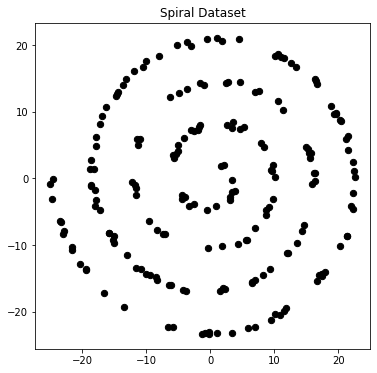

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
np.random.seed(8888)

# spiral dataset
n = np.sqrt(np.random.rand(200,1)) * 1440 * (2*np.pi)/360
d1x = -np.cos(n)*n + np.random.rand(200,1) * 0.8
d1y = np.sin(n)*n + np.random.rand(200,1) * 0.8

plt.scatter(d1x, d1y, c = 'black', s=40)
plt.title('Spiral Dataset')
X = np.hstack((d1x,d1y));

## kNN Graph

In [2]:
# compute pairwise distance matrix to find k nearest neighbors for each x_i in X
from sklearn.metrics import pairwise_distances
dist_matrix = pairwise_distances(X)
dist_matrix.shape

# function that outputs N x k matrix with k nearest neighbors for each observation in X
def nearest_neighbors(X, k):
    # we use k+1 here since Xi will have the shortest distance to itself
    knn_matrix = np.zeros((len(X), k))
    # compute pairwise distances
    dist_matrix = pairwise_distances(X)
    # for each row find indices of k nearest neighbors
    for i in range(len(X)):
        knn_matrix[i] = dist_matrix[i,:].argsort()[1:k+1]
    return knn_matrix

(200, 200)

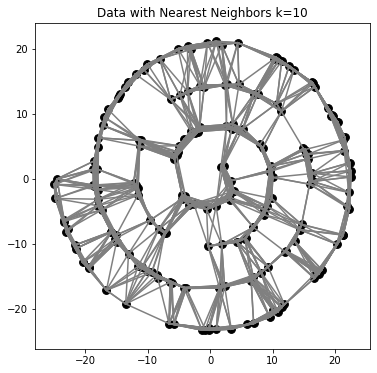

In [3]:
# set number of neighbors and find neighborhood matrix
k = 10
X_neighbors = nearest_neighbors(X, k)

# loop through each data point and draw lines to nearest neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50);

for i in range(len(X)):
    neighbors = X_neighbors[i]
    for j in range(len(neighbors)):
        plt.plot(X[[i, neighbors.astype('int')[j]], 0], X[[i, neighbors.astype('int')[j]], 1], c='gray')

plt.title('Data with Nearest Neighbors k=' + str(k))
plt.scatter(X[:,0], X[:,1], c='black', s=60);

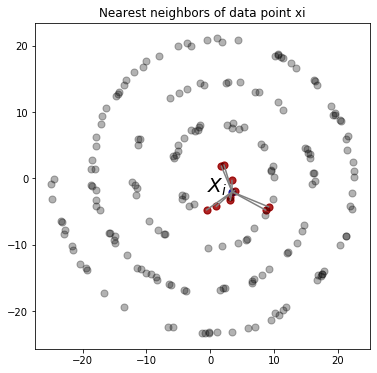

In [4]:
# neighbors for a given xi (first element in X)
pos = 3
neighbors = X_neighbors[pos] # indices of neighbors
plt.figure(figsize=(6,6))
plt.scatter(X[pos, 0], X[pos, 1], c='blue', s=50, alpha=0.8)
plt.text(X[pos, 0]-4, X[pos, 1], s='$X_i$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[pos, neighbors.astype('int')[i]], 0], X[[pos, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.3, c='black', s=50)
plt.title('Nearest neighbors of data point xi');

In [5]:
# get coordinates for the neighborhood of xi
xi_nn = []
for i in range(len(neighbors)):
    xi_nn.append(X[neighbors.astype('int')[i]])
xi_nn = np.array(xi_nn)

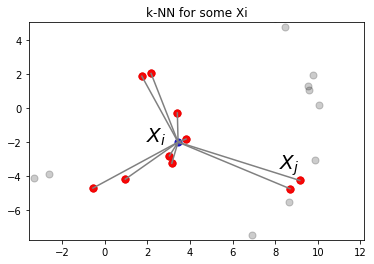

In [6]:
# zoom in on xi with nearest neighbor edges
j = k-1
plt.scatter(X[pos, 0], X[pos, 1], c='blue', s=50, alpha=0.8)
plt.text(X[pos, 0] - 1.5, X[pos, 1], s='$X_i$', size=20)
plt.text(xi_nn[j][0]-1.0, xi_nn[j][1] + 0.7, s='$X_j$', size=20)
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
for i in range(len(neighbors)):
    plt.plot(X[[pos, neighbors.astype('int')[i]], 0], X[[pos, neighbors.astype('int')[i]], 1], c='gray')
plt.scatter(X[:,0], X[:,1], alpha=0.2, c='black', s=50);
plt.scatter(X[neighbors.astype('int'), 0], X[neighbors.astype('int'), 1], c='red', alpha = 0.8, s=50)
plt.title('k-NN for some Xi')
plt.xlim(np.min(xi_nn[:,0])-3,np.max(xi_nn[:,0])+3)
plt.ylim(np.min(xi_nn[:,1]-3),np.max(xi_nn[:,1])+3);

## Graph Geodesics on the Swiss Roll

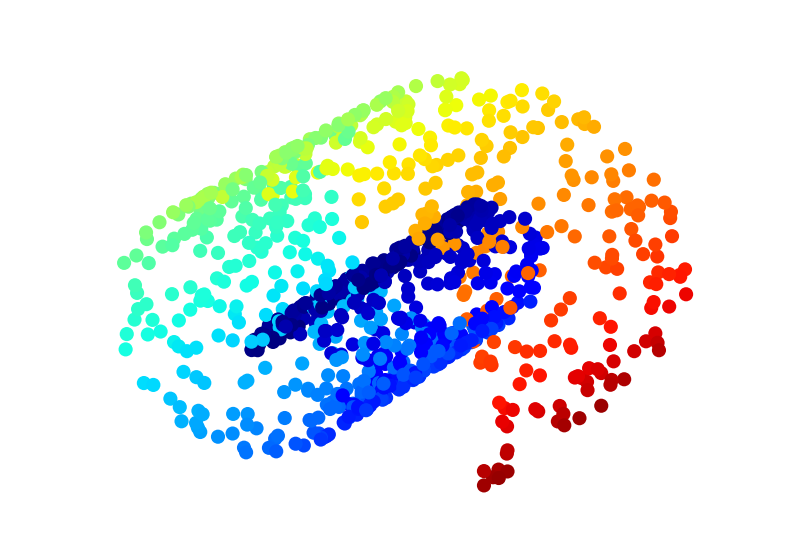

In [7]:
# generate data
n = 1000
x = np.random.rand(2,n)

# swiss roll transformation
v = 3*np.pi/2*(.1 + 2*x[0,:])
X  = np.zeros([3,n])
X[1,:] = 20*x[1,:]
X[0,:] = - np.cos(v)*v
X[2,:] = np.sin(v)*v

from mpl_toolkits.mplot3d import Axes3D

# plot swiss roll
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[0,:], X[1,:], X[2,:], c=plt.cm.jet((X[0,:]**2+X[2,:]**2)/100), s=200, lw=0, alpha=1)
ax.set_xlim(np.min(X[0,:]),np.max(X[0,:]))
ax.set_ylim(np.min(X[1,:]),np.max(X[1,:]))
ax.set_zlim(np.min(X[2,:]),np.max(X[2,:]))
ax.axis("off");

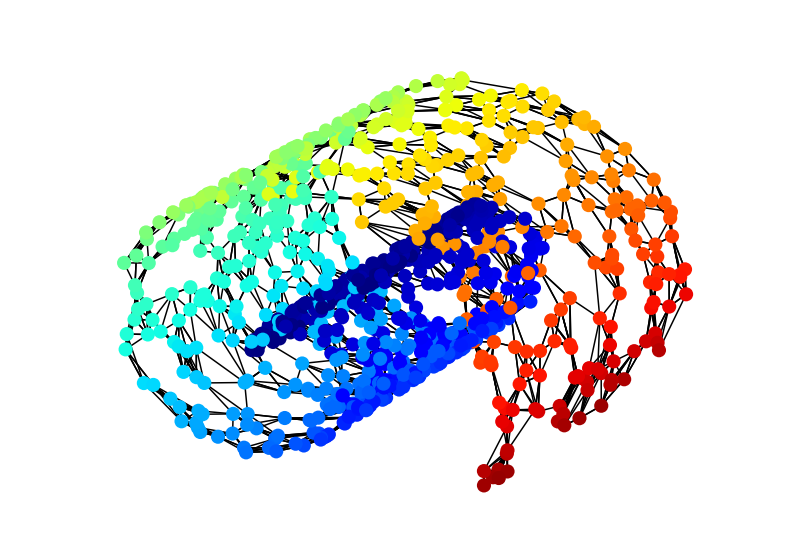

In [8]:
# format X as (n_samples, n_features)
X = np.transpose(X)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection="3d")

# plot original swiss roll
ax.scatter(X[:,0], X[:,1], X[:,2], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1);

# loop through each data point and plot lines connecting nearest neighbors
k = 6 # number of nearest neighbors
knn = nearest_neighbors(X, k)
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        ax.plot(X[[i, neighbors.astype('int')[j]], 0], 
                X[[i, neighbors.astype('int')[j]], 1], 
                X[[i, neighbors.astype('int')[j]], 2], color='black');

# configure axis settings
ax.axis("off")
ax.set_xlim(np.min(X[:,0]),np.max(X[:,0]))
ax.set_ylim(np.min(X[:,1]),np.max(X[:,1]))
ax.set_zlim(np.min(X[:,2]),np.max(X[:,2]))
plt.show();

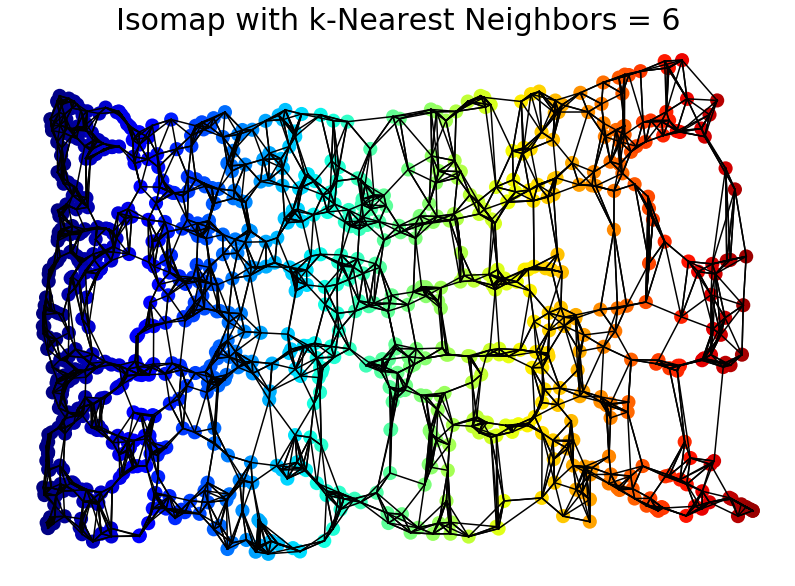

In [9]:
from sklearn.manifold import Isomap
data = X

# apply isomap with k = 6 and output dimension = 2
model = Isomap(n_components=2, n_neighbors=6)
proj = model.fit_transform(data)

# plot the isomap projection
plt.figure(figsize=(14,10))
plt.scatter(proj[:, 0], proj[:, 1], c=plt.cm.jet((X[:,0]**2+X[:,2]**2)/100), s=200, lw=0, alpha=1)

# plot lines connecting the same neighboring points from our original data
for i in range(len(X)):
    neighbors = knn[i]
    for j in range(len(neighbors)):
        plt.plot(proj[[i, neighbors.astype('int')[j]], 0], 
                 proj[[i, neighbors.astype('int')[j]], 1], color='black');
        
plt.title('Isomap with k-Nearest Neighbors = ' + str(k), size=30)
plt.axis("off")
plt.show();

## Facial Images

In [10]:
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'

# ignore warnings
import warnings
warnings.filterwarnings('ignore');

(2370, 2914)

(2370, 62, 47)

array([ 8,  4, 21, ...,  8, 10,  8], dtype=int64)

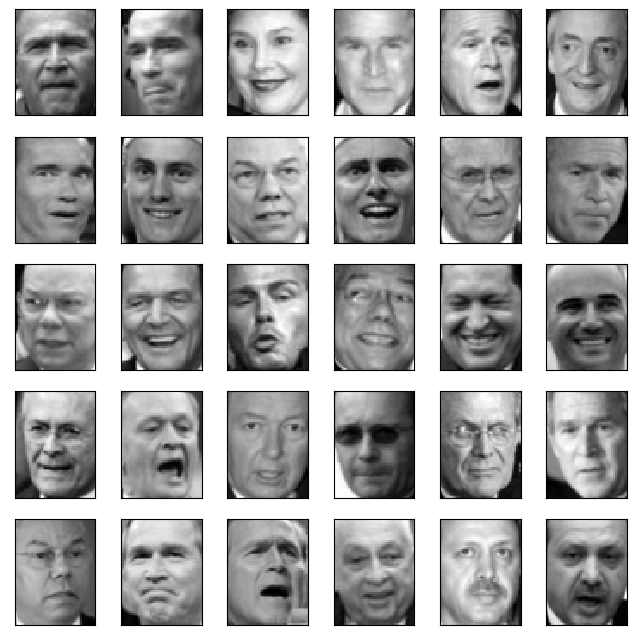

In [11]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape
faces.images.shape
faces.target

# plot some images
fig, ax = plt.subplots(5, 6, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(faces.data[i].reshape(62, 47), cmap='gray');

In [12]:
# define a function to plot small images over the data points
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

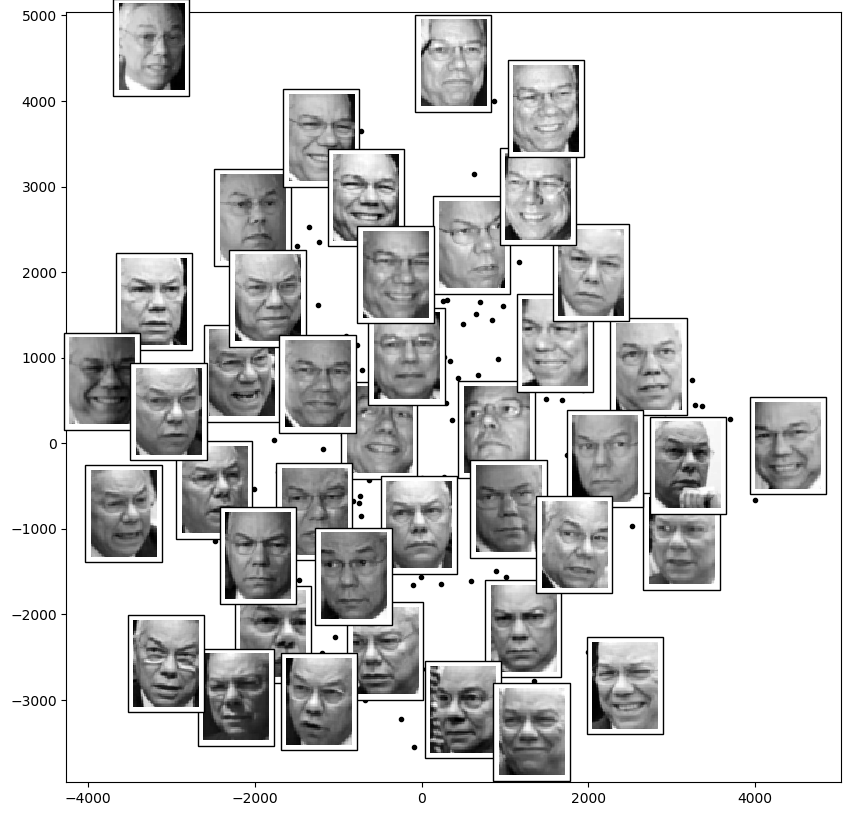

In [13]:
target = 5
np.random.seed(8888)
fig, ax = plt.subplots(figsize=(10, 10))
data = faces.data[faces.target==target]
images = faces.images[faces.target==target]
plot_components(data, model=Isomap(n_components=2, n_neighbors=8), images=images, thumb_frac=0.1)

## Object Recognition

In [14]:
import os
import matplotlib.image as img
from skimage.color import rgb2gray
os.getcwd()

'C:\\Users\\GAO\\Jupyter'

In [16]:
def get_sample(path):
    ix = [int(i) for i in np.arange(0, len(os.listdir(path)), 72)]
    object_files = [os.listdir(path)[i] for i in (ix)]

    data = []
    for file in object_files:
        data.append(rgb2gray(plt.imread(path + '/' + file)))
    data = np.array(data)
    images = data
    data = data.reshape(100, 128*128)
    return data, images

path = 'C:/Users/GAO/Jupyter/data/coil-100'
sample_data, sample_images = get_sample(path)
sample_data.shape
sample_images.shape

(100, 16384)

(100, 128, 128)

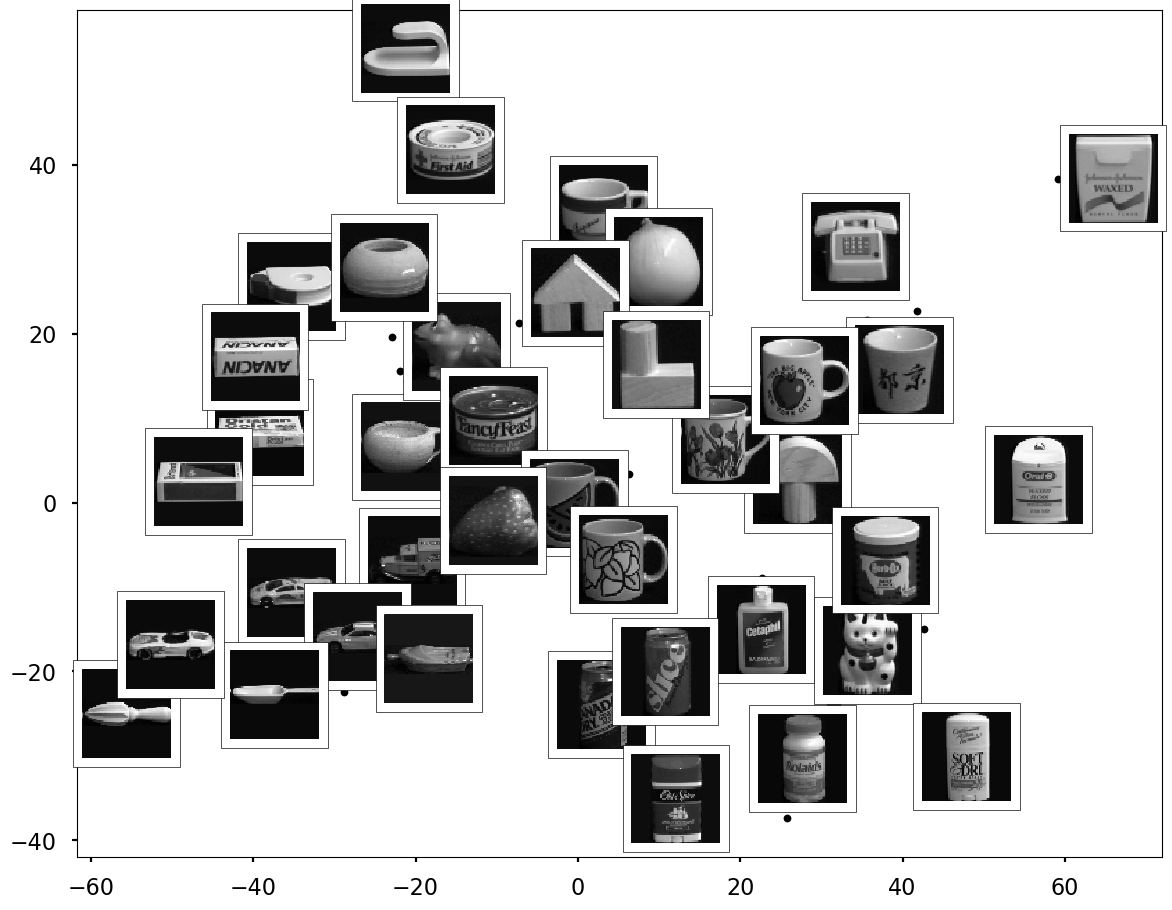

In [25]:
from sklearn.manifold import Isomap
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(figsize=(14, 11))
plot_components(sample_data,
                model=Isomap(n_components=2),
                images=sample_images[:, ::2, ::2],
                thumb_frac=0.07)

In [28]:
os.listdir(path)[0]

'obj100__0.png'

In [29]:
# read in all the images for a collection of objects
def get_objects(path, keys):
    obj_keys = ['obj' + str(key) + '__' for key in keys]
    data = []
    for obj_key in obj_keys:
        object_files = [x for x in os.listdir(path) if obj_key in x]
        for image in object_files:
            data.append(rgb2gray(plt.imread(path + '/' + image)))

    data = np.array(data)
    images = data
    data = data.reshape(len(keys)*72, 128*128)
    return data, images

In [30]:
# select a set of indices for object images
objects = np.arange(1, 90, 15)
object_data, object_images = get_objects(path, objects)
object_data.shape
object_images.shape

(432, 16384)

(432, 128, 128)

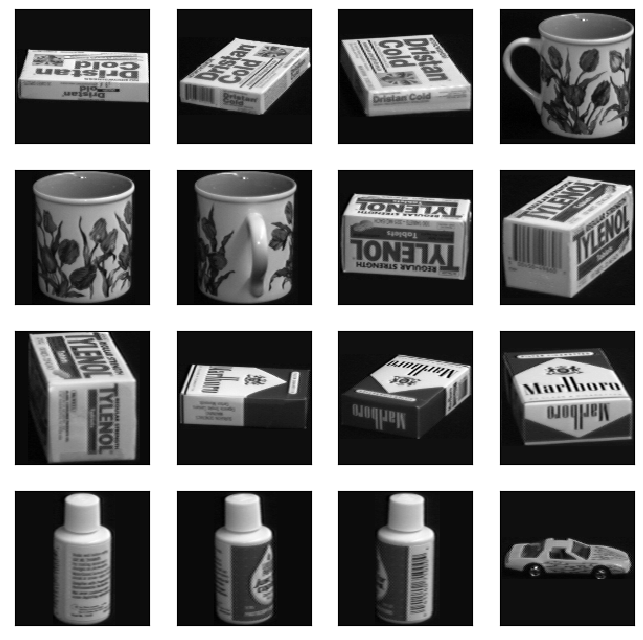

In [35]:
fig, ax = plt.subplots(4, 4, subplot_kw=dict(xticks=[], yticks=[]), figsize=(8,8))
for i, axi in enumerate(ax.flat):
    _ = axi.imshow(object_images[(i+1)*24 - 4], cmap='gray');

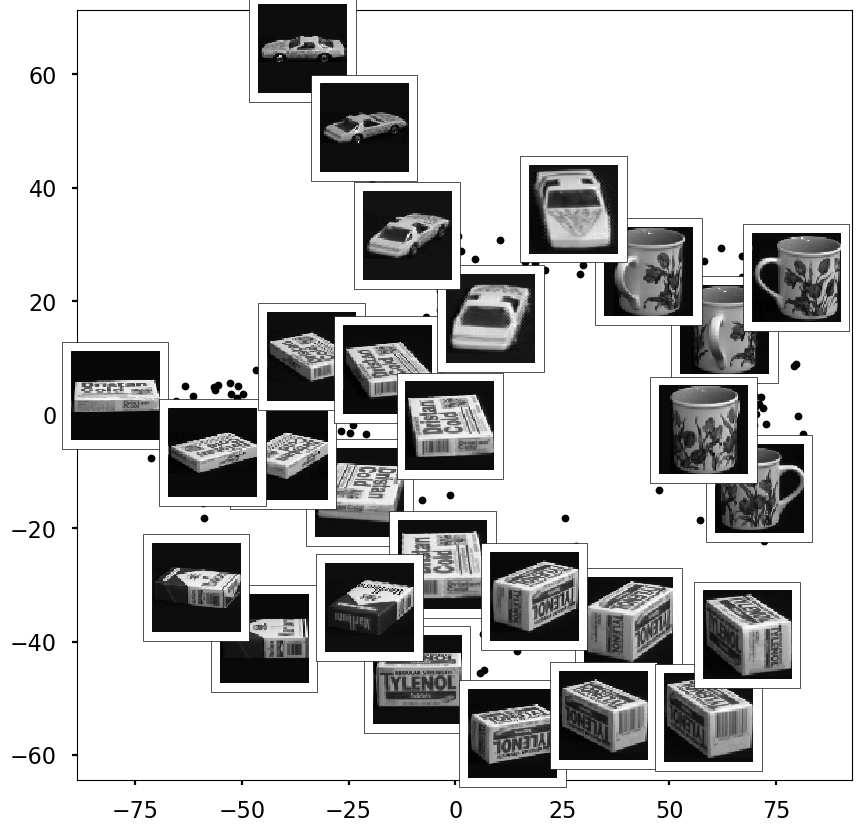

In [36]:
from sklearn.manifold import Isomap
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(object_data, 
                model=Isomap(n_components=2, n_neighbors=15),
                images=object_images[:, ::2, ::2],
                thumb_frac=0.1)